<h1>HOW TO CLEAN DATA WITH PYTHON</h1>
<h3>Cleaning US Census Data</h3>
You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?

<h2><u>Part 1:</u></h2>
<h3>Inspect the Data!</h3>
<p>1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.</p>
<p>Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?</p>


In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
#Opening all csv files using * at once

csv_files = glob.glob("state*.csv")

print("The names of the CSV files are:\n", csv_files)
print("--------------------------------------------------------------------------------------------------")

The names of the CSV files are:
 ['states0.csv', 'states1.csv', 'states2.csv', 'states3.csv', 'states4.csv', 'states5.csv', 'states6.csv', 'states7.csv', 'states8.csv', 'states9.csv']
--------------------------------------------------------------------------------------------------


<p>2. It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?</p>
<p>Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.</p>


In [3]:
#Getting what kind if information they are holding

us_census = []

for csv_file in csv_files:
    csv_info = pd.read_csv(csv_file)
    us_census.append(csv_info)
    print(us_census)

us_census = pd.concat(us_census)
print("--------------------------------------------------------------------------------------------------")

[   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   
5           5    Colorado   5278906   20.78438003220608%   69.89557165861504%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   
5   3.54637681159

[   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   
5           5    Colorado   5278906   20.78438003220608%   69.89557165861504%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   
5   3.54637681159

[   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   
5           5    Colorado   5278906   20.78438003220608%   69.89557165861504%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   
5   3.54637681159

5  2851385M_2890732F  ]
--------------------------------------------------------------------------------------------------


<p>3. Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?</p>

In [4]:
print("The name of the columns are: \n", us_census.columns)
print("--------------------------------------------------------------")
print("The data type is: \n", us_census.dtypes)
print("--------------------------------------------------------------------------------------------------")

The name of the columns are: 
 Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
--------------------------------------------------------------
The data type is: 
 Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object
--------------------------------------------------------------------------------------------------


<p>4. Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.</p>

In [5]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


<p>Regex to the Rescue <br>
5. Use regex to turn the Income column into a format that is ready for conversion into a numerical type.</p>

In [7]:
# To remove Dollar ($) sign
us_census.Income = us_census["Income"].replace("[\$,]", "", regex=True)

# Convert Income Columns into numbers
us_census.Income = pd.to_numeric(us_census.Income)

print(us_census.Income.head())

0    43296.358603
1    70354.743902
2    54207.820955
3    41935.633968
4    67264.782303
Name: Income, dtype: float64


<p>6. Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.<br>

Split the column into those two new columns using str.split and separating out those results.</p>

In [12]:
us_census["str_split"] = us_census["GenderPop"].str.split("_")

us_census["Men"] = us_census.str_split.str.get(0)
us_census["Women"] = us_census.str_split.str.get(1)

print(us_census.head())

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific        Income            GenderPop  \
0  0.03435374149659865%  43296.35860

<p>7. Convert both of the columns into numerical datatypes. <br>
There is still an M or an F character in each entry! We should remove those before we convert.</p>

In [14]:
# At first, we remove 'M' and 'F' from the columns
us_census.Men = us_census["Men"].replace("[M]", "", regex=True)
us_census.Women = us_census["Women"].replace("[F]", "", regex=True)

# Now convert the entire column into numbers
us_census.Men = pd.to_numeric(us_census.Men)
us_census.Women = pd.to_numeric(us_census.Women)

us_census[["Men", "Women"]].head()

,Men,Women
0,2341093,2489527.0
1,384160,349215.0
2,3299088,3342840.0
3,1451913,1506295.0
4,19087135,19334329.0


<p>8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!<br>

Use matplotlib to make a scatterplot!<br><br>
plt.scatter(the_women_column, the_income_column)<br> 
Remember to call plt.show() to see the graph!</p>

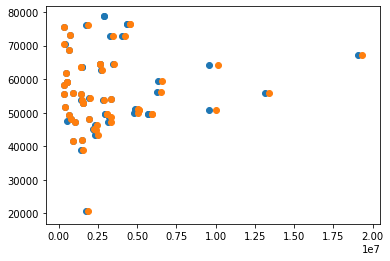

In [15]:
import matplotlib.pyplot as plt

plt.scatter(us_census.Men, us_census.Income)
plt.scatter(us_census.Women, us_census.Income)

<p>9. Did you get an error? <br>
These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.<br><br>

We can fill in those nans by using pandas’ .fillna() function.<br><br>

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.<br><br>

Print out the Women column after filling the nan values to see if it worked!</p>

In [16]:
us_census = us_census.fillna(value={"Women": us_census.TotalPop - us_census.Men})

print(us_census)

   Unnamed: 0                 State  TotalPop             Hispanic  \
0           0               Alabama   4830620  3.7516156462584975%   
1           1                Alaska    733375   5.909580838323351%   
2           2               Arizona   6641928  29.565921052631502%   
3           3              Arkansas   2958208   6.215474452554738%   
4           4            California  38421464  37.291874687968054%   
5           5              Colorado   5278906   20.78438003220608%   
0           0              Colorado   5278906   20.78438003220608%   
1           1           Connecticut   3593222  15.604830917874388%   
2           2              Delaware    926454    8.82476635514019%   
3           3  District of Columbia    647484   9.165921787709499%   
4           4               Florida  19645772    21.3385426653884%   
5           5               Georgia  10006693   8.418242207460397%   
0           0               Georgia  10006693   8.418242207460397%   
1           1       

<p>10. We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.</p>

In [25]:
print(us_census.duplicated)

<bound method DataFrame.duplicated of    Unnamed: 0                 State  TotalPop             Hispanic  \
0           0               Alabama   4830620  3.7516156462584975%   
1           1                Alaska    733375   5.909580838323351%   
2           2               Arizona   6641928  29.565921052631502%   
3           3              Arkansas   2958208   6.215474452554738%   
4           4            California  38421464  37.291874687968054%   
5           5              Colorado   5278906   20.78438003220608%   
0           0              Colorado   5278906   20.78438003220608%   
1           1           Connecticut   3593222  15.604830917874388%   
2           2              Delaware    926454    8.82476635514019%   
3           3  District of Columbia    647484   9.165921787709499%   
4           4               Florida  19645772    21.3385426653884%   
5           5               Georgia  10006693   8.418242207460397%   
0           0               Georgia  10006693   8.41

<p>11. Drop those duplicates using the .drop_duplicates() function.</p>

In [31]:
new_census = us_census.drop_duplicates(["State"])
print(new_census.head())

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific        Income            GenderPop  \
0  0.03435374149659865%  43296.35860

<p>12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.</p>

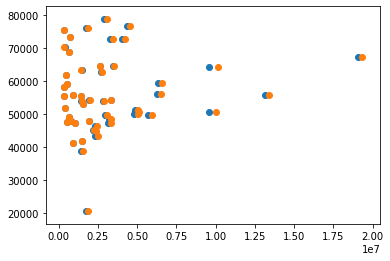

In [32]:
plt.scatter(new_census.Men, new_census.Income)
plt.scatter(new_census.Women, new_census.Income)

<p>Histograms of Races<br>
13. Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.</p>

Following is the Histogram of column Hispanic: 



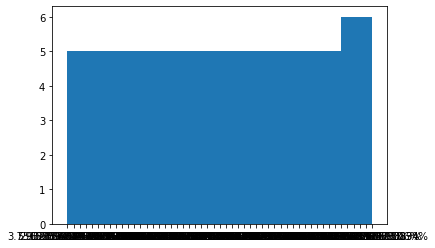

Following is the Histogram of column White: 



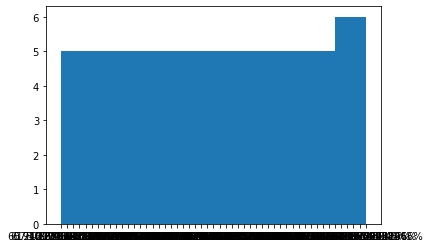

Following is the Histogram of column Black: 



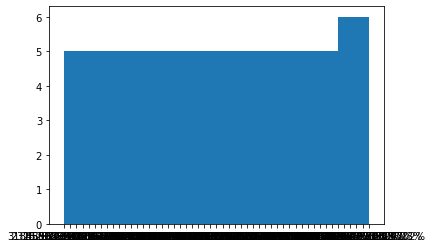

Following is the Histogram of column Native: 



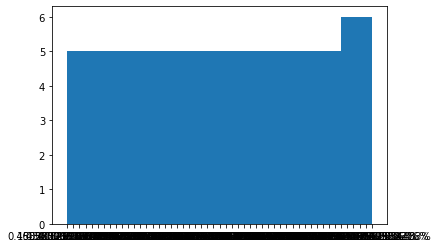

Following is the Histogram of column Asian: 



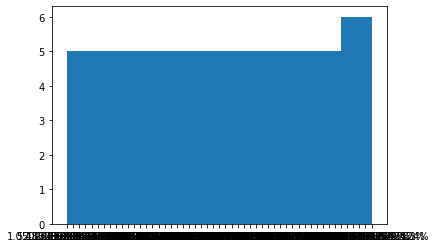

TypeError: nan is not a string

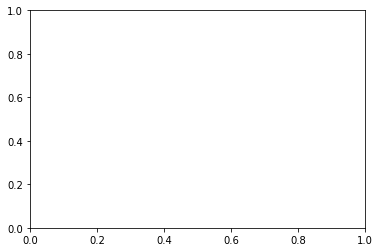

In [33]:
# Graph in the following will not coorect because the data is not converted into numeric, completely

plt.hist(new_census.Hispanic)
print("Following is the Histogram of column Hispanic: \n")
plt.show()

plt.hist(new_census.White)
print("Following is the Histogram of column White: \n")
plt.show()

plt.hist(new_census.Black)
print("Following is the Histogram of column Black: \n")
plt.show()

plt.hist(new_census.Native)
print("Following is the Histogram of column Native: \n")
plt.show()

plt.hist(new_census.Asian)
print("Following is the Histogram of column Asian: \n")
plt.show()

plt.hist(new_census.Pacific)
print("Following is the Histogram of column Pacific: \n")
plt.show()

<p>14. Try to make a histogram for each one!<br><br>

You will have to get the columns into numerical format, and those percentage signs will have to go.<br><br>

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.<br><br>

Get Creative</p>

In [35]:
# First, remove the percentage sign

new_census.Hispanic = new_census["Hispanic"].replace("[\%,]", "", regex=True)
new_census.White = new_census["White"].replace("[\%,]", "", regex=True)
new_census.Black = new_census["Black"].replace("[\%,]", "", regex=True)
new_census.Native = new_census["Native"].replace("[\%,]", "", regex=True)
new_census.Asian = new_census["Asian"].replace("[\%,]", "", regex=True)
new_census.Pacific = new_census["Pacific"].replace("[\%,]", "", regex=True)

# Now, convert the data into numbers
new_census.Hispanic = pd.to_numeric(new_census.Hispanic)
new_census.White = pd.to_numeric(new_census.White)
new_census.Black = pd.to_numeric(new_census.Black)
new_census.Native = pd.to_numeric(new_census.Native)
new_census.Asian = pd.to_numeric(new_census.Asian)
new_census.Pacific = pd.to_numeric(new_census.Pacific)

print(new_census.head())

   Unnamed: 0       State  TotalPop   Hispanic      White      Black  \
0           0     Alabama   4830620   3.751616  61.878656  31.252976   
1           1      Alaska    733375   5.909581  60.910180   2.848503   
2           2     Arizona   6641928  29.565921  57.120000   3.850987   
3           3    Arkansas   2958208   6.215474  71.137810  18.968759   
4           4  California  38421464  37.291875  40.215789   5.677396   

      Native      Asian   Pacific        Income            GenderPop  \
0   0.453231   1.050255  0.034354  43296.358603    2341093M_2489527F   
1  16.391018   5.450299  1.058683  70354.743902      384160M_349215F   
2   4.355066   2.876579  0.167632  54207.820955    3299088M_3342840F   
3   0.522920   1.142336  0.146861  41935.633968    1451913M_1506295F   
4   0.405292  13.052234  0.351410  67264.782303  19087135M_19334329F   

                str_split       Men       Women  
0    [2341093M, 2489527F]   2341093   2489527.0  
1      [384160M, 349215F]    38416

<p>15. Phew. You’ve definitely impressed your boss on your first day of work.<br><br>

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?<br><br>

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.</p>

Following is the Histogram of column Hispanic: 



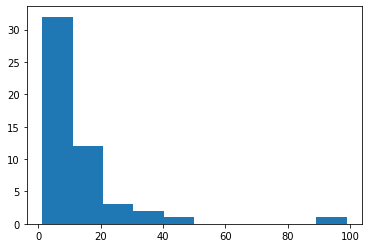

Following is the Histogram of column White: 



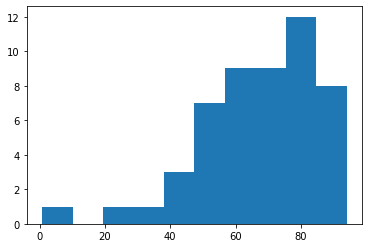

Following is the Histogram of column Black: 



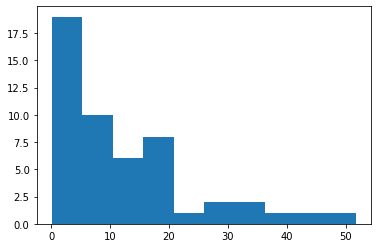

Following is the Histogram of column Native: 



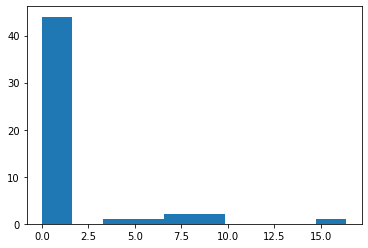

Following is the Histogram of column Asian: 



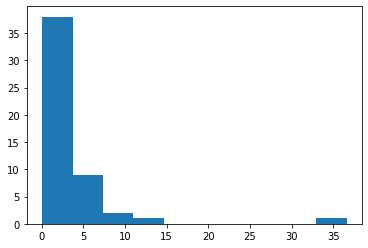

Following is the Histogram of column Pacific: 



C:\Users\syedw\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\syedw\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


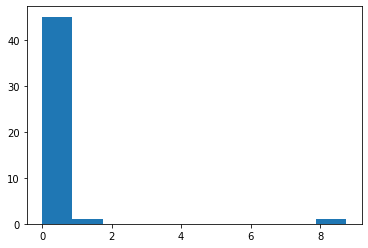

In [37]:
print("Following is the Histogram of column Hispanic: \n")
plt.show(plt.hist(new_census.Hispanic))

print("Following is the Histogram of column White: \n")
plt.show(plt.hist(new_census.White))

print("Following is the Histogram of column Black: \n")
plt.show(plt.hist(new_census.Black))

print("Following is the Histogram of column Native: \n")
plt.show(plt.hist(new_census.Native))

print("Following is the Histogram of column Asian: \n")
plt.show(plt.hist(new_census.Asian))

print("Following is the Histogram of column Pacific: \n")
plt.show(plt.hist(new_census.Pacific))

<h2><u>Part 2:</u></h2>

<h3>LEARN DATA ANALYSIS WITH PANDAS<br><br>
Petal Power Inventory<br>
You’re the lead data analyst for a chain of gardening stores called Petal Power. Help them analyze their inventory!</h3>

In [38]:
import pandas as pd

<p>Answer Customer Emails <br><br>
1. Data for all of the locations of Petal Power is in the file inventory.csv. Load the data into a DataFrame called inventory.</p>

In [40]:
inventory = pd.read_csv("inventory.csv")
print(inventory)

         location  product_type         product_description  quantity  price
0   Staten Island         seeds                       daisy         4   6.99
1   Staten Island         seeds                  calla lily        46  19.99
2   Staten Island         seeds                      tomato        85  13.99
3   Staten Island  garden tools                        rake         4  13.99
4   Staten Island  garden tools                 wheelbarrow         0  89.99
5   Staten Island  garden tools                       spade        93  19.99
6   Staten Island  pest_control               insect killer        74  12.99
7   Staten Island  pest_control                 weed killer         8  23.99
8   Staten Island       planter  20 inch terracotta planter         0  17.99
9   Staten Island       planter      8 inch plastic planter        53   3.99
10       Brooklyn         seeds                       daisy        50   6.99
11       Brooklyn         seeds                  calla lily         0  19.99

<p>2. Inspect the first 10 rows of inventory.</p>

In [41]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


<p>3. The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.</p>

In [42]:
staten_island = inventory.head(10)

<p>4. A customer just emailed you asking what products are sold at your Staten Island location. Select the column product_description from staten_island and save it to the variable product_request.</p>

In [43]:
product_request = staten_island['product_description']
print(product_request)

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object


<p>5. Another customer emails to ask what types of seeds are sold at the Brooklyn location.<br><br>

Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request</p>

In [44]:
seed_request = inventory[(inventory.location == 'Brooklyn') & (inventory.product_type	 == 'seeds')]
print(seed_request)

    location product_type product_description  quantity  price
10  Brooklyn        seeds               daisy        50   6.99
11  Brooklyn        seeds          calla lily         0  19.99
12  Brooklyn        seeds              tomato         0  13.99


<p>Inventory<br><br>
6. Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.</p>

In [46]:
inventory['in_stock'] = inventory.apply(lambda x: 'True' if x['quantity'] > 0 else 'False', axis=1)
print(inventory)

         location  product_type         product_description  quantity  price  \
0   Staten Island         seeds                       daisy         4   6.99   
1   Staten Island         seeds                  calla lily        46  19.99   
2   Staten Island         seeds                      tomato        85  13.99   
3   Staten Island  garden tools                        rake         4  13.99   
4   Staten Island  garden tools                 wheelbarrow         0  89.99   
5   Staten Island  garden tools                       spade        93  19.99   
6   Staten Island  pest_control               insect killer        74  12.99   
7   Staten Island  pest_control                 weed killer         8  23.99   
8   Staten Island       planter  20 inch terracotta planter         0  17.99   
9   Staten Island       planter      8 inch plastic planter        53   3.99   
10       Brooklyn         seeds                       daisy        50   6.99   
11       Brooklyn         seeds         

<p>7. Petal Power wants to know how valuable their current inventory is.<br><br>

Create a column called total_value that is equal to price multiplied by quantity.</p>

In [47]:
inventory['total_value'] = inventory['price']*inventory['quantity']
print(inventory)

         location  product_type         product_description  quantity  price  \
0   Staten Island         seeds                       daisy         4   6.99   
1   Staten Island         seeds                  calla lily        46  19.99   
2   Staten Island         seeds                      tomato        85  13.99   
3   Staten Island  garden tools                        rake         4  13.99   
4   Staten Island  garden tools                 wheelbarrow         0  89.99   
5   Staten Island  garden tools                       spade        93  19.99   
6   Staten Island  pest_control               insect killer        74  12.99   
7   Staten Island  pest_control                 weed killer         8  23.99   
8   Staten Island       planter  20 inch terracotta planter         0  17.99   
9   Staten Island       planter      8 inch plastic planter        53   3.99   
10       Brooklyn         seeds                       daisy        50   6.99   
11       Brooklyn         seeds         

<p>8. The Marketing department wants a complete description of each product for their catalog.<br><br>
    
The following lambda function combines product_type and product_description into a single string:<br><br>

combine_lambda = lambda row: \<br>
    <p>'{} - {}'.format(row.product_type,<br>
                     row.product_description)</p>
Paste this function into script.py.</p>

In [50]:
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)

<p>9. Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.</p>

In [52]:
inventory['full_description'] = inventory.apply(combine_lambda, axis=1)
print(inventory.head(10))

        location  product_type         product_description  quantity  price  \
0  Staten Island         seeds                       daisy         4   6.99   
1  Staten Island         seeds                  calla lily        46  19.99   
2  Staten Island         seeds                      tomato        85  13.99   
3  Staten Island  garden tools                        rake         4  13.99   
4  Staten Island  garden tools                 wheelbarrow         0  89.99   
5  Staten Island  garden tools                       spade        93  19.99   
6  Staten Island  pest_control               insect killer        74  12.99   
7  Staten Island  pest_control                 weed killer         8  23.99   
8  Staten Island       planter  20 inch terracotta planter         0  17.99   
9  Staten Island       planter      8 inch plastic planter        53   3.99   

  in_stock  total_value                      full_description  
0     True        27.96                         seeds - daisy  
1 